In [39]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [40]:
import sys
import os

sys.path.append("../")
# ! pip install -r ../../../requirements.txt
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd

In [41]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

In [43]:

# # pred_horiz
# for city in config.city_list:

#     cityname = city.lower()

#     city_label_printed = []

#     for scale in config.scales_def:
#         for i_o_length in config.i_o_lengths_def:
#             for pred_horiz in config.pred_horiz:
#                 prefix = ProcessRaw.file_prefix(cityname=cityname,
#                                                 io_length=i_o_length, 
#                                                 pred_horiz=pred_horiz, 
#                                                 scale=scale)
#                 filename = "val_csv_" + prefix + ".csv"
#                 df = pd.read_csv(os.path.join("csv_val_files", filename))

#                 epoch_list = df.epoch.tolist()
#                 val_loss = df.val_loss.tolist()

# #                 epoch_list = epoch_list[-1]
# #                 val_loss = val_loss[-1]
                
#                 if cityname in city_label_printed:
#                     plt.plot(epoch_list, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=pred_horiz/8)
#                 else:
#                     plt.plot(epoch_list, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=pred_horiz/8, \
#                             label=prefix)
#                     city_label_printed.append(cityname)

# plt.title("Pred-horiz")
# plt.xlabel("Epochs")
# plt.ylabel("Validation-MSE")
# plt.yscale('log')
# plt.legend()
# plt.show()



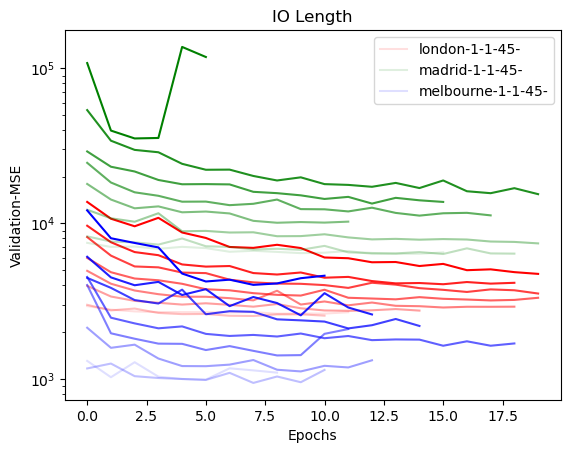

In [5]:

# IO_length
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales_def:
        for i_o_length in config.i_o_lengths:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                df = pd.read_csv(os.path.join("csv_val_files", filename))

                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()

                
                if cityname in city_label_printed:
                    plt.plot(epoch_list, val_loss, 
                             color=city_color[cityname],\
                            alpha=i_o_length/8)
                else:
                    plt.plot(epoch_list, val_loss, 
                             color=city_color[cityname],\
                            alpha=i_o_length/8, \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.title("IO Length")
plt.xlabel("Epochs")
plt.ylabel("Validation-MSE")
plt.yscale('log')
plt.legend()
plt.show()



In [44]:

# # IO_length
# for city in config.city_list:

#     cityname = city.lower()

#     city_label_printed = []

#     for scale in config.scales:
#         for i_o_length in config.i_o_lengths_def:
#             for pred_horiz in config.pred_horiz_def:
#                 prefix = ProcessRaw.file_prefix(cityname=cityname,
#                                                 io_length=i_o_length, 
#                                                 pred_horiz=pred_horiz, 
#                                                 scale=scale)
#                 filename = "val_csv_" + prefix + ".csv"
    
#                 try:
#                     df = pd.read_csv(os.path.join("csv_val_files", filename))
#                 except (pd.errors.EmptyDataError, FileNotFoundError) as e:
# #                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
# #                     print (e)
#                     continue
    
#                 epoch_list = df.epoch.tolist()
#                 val_loss = df.val_loss.tolist()

                
#                 if cityname in city_label_printed:
#                     plt.plot(epoch_list, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=scale/250)
#                 else:
#                     plt.plot(epoch_list, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=scale/250, \
#                             label=prefix)
#                     city_label_printed.append(cityname)

# plt.title("Scales")
# plt.xlabel("Epochs")
# plt.ylabel("Validation-MSE")
# plt.yscale('log')
# plt.legend()
# plt.show()



In [45]:

# # pred_horiz
# for city in config.city_list:

#     cityname = city.lower()

#     city_label_printed = []

#     for scale in config.scales_def:
#         for i_o_length in config.i_o_lengths_def:
#             for pred_horiz in config.pred_horiz:
#                 prefix = ProcessRaw.file_prefix(cityname=cityname,
#                                                 io_length=i_o_length, 
#                                                 pred_horiz=pred_horiz, 
#                                                 scale=scale)
#                 filename = "val_csv_" + prefix + ".csv"
#                 df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))

                    
#                 epoch_list = df.epoch.tolist()
#                 val_loss = df.val_loss.tolist()
#                 naive_model= df["naive-model"].tolist()
#                 loss = df.loss.tolist()

#                 # get the last epoch (a.k.a converged model)
#                 epoch_list = epoch_list[-1]
#                 val_loss = val_loss[-1]
                
# #                 if naive_model[-1] < val_loss:
# #                     # invalid, GIGO regime
# #                     continue
                    
# #                 if loss[-1] > val_loss:
# #                     # invalid, Underfitting
# #                     continue
                          
                
                
#                 if cityname in city_label_printed:
#                     plt.scatter(pred_horiz, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=pred_horiz/max(config.pred_horiz)) 
#                 else:
#                     plt.scatter(pred_horiz, val_loss, 
#                              color=city_color[cityname],\
#                             alpha=pred_horiz/max(config.pred_horiz), \
#                             label=prefix)
#                     city_label_printed.append(cityname)

# plt.xlabel("Prediction Horizon")
# plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
# plt.yscale('log')
# plt.legend()
# plt.show()



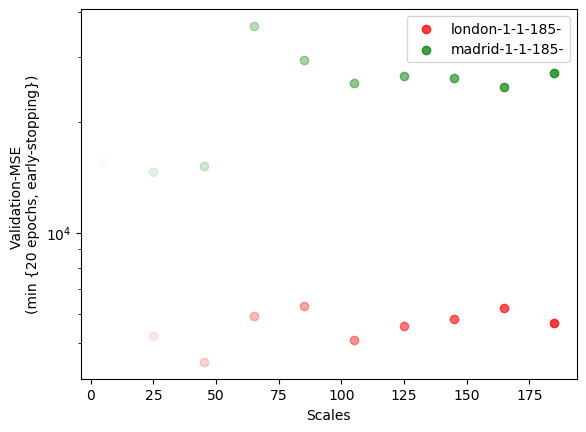

In [48]:

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales[::-1]:
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
                if naive_model[-1] < val_loss:
                    # invalid, GIGO regime
                    continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales))
                else:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales), \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()

pred_horiz : 1
pred_horiz : 1
pred_horiz : 1


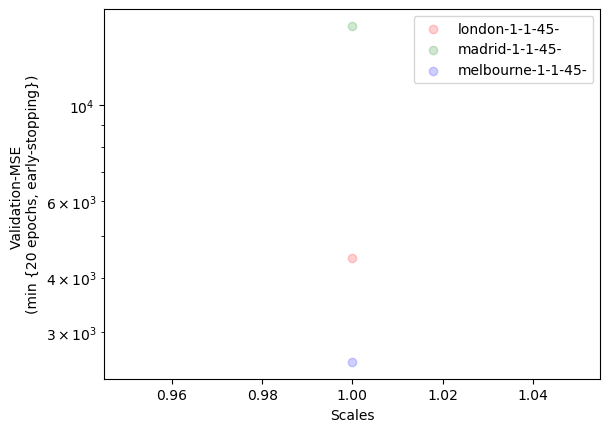

In [26]:

# pred horiz
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales_def:
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz[::-1]:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
#                 if naive_model[-1] < val_loss:
#                     # invalid, GIGO regime
#                     continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                sprint (pred_horiz)
                
                if cityname in city_label_printed:
                    plt.scatter(pred_horiz, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales))
                else:
                    plt.scatter(pred_horiz, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales), \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()

[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-8-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-7-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-6-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-5-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-4-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-3-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_london-2-1-45-.csv'
i_o_length : 1
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-8-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-7-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-6-1-45-.csv'
[Errno 2] No such file or directory: 'csv_val_files_non_zero/val_csv_madrid-5-1-45-.csv'
[Errno

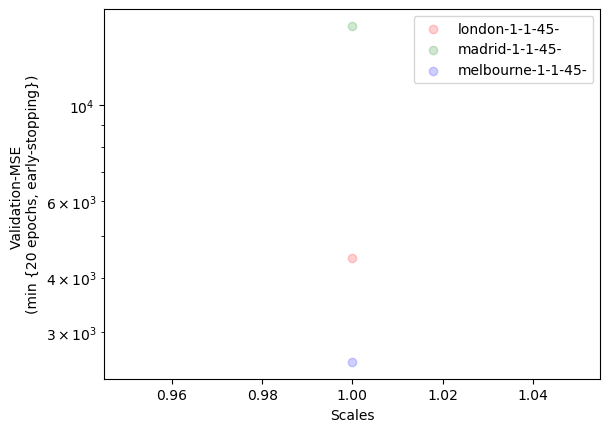

In [38]:

# i_o_length
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales_def:
        for i_o_length in config.i_o_lengths[::-1]:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    # continue
                    # raise Exception(e)
                    print (str(e))
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
#                 if naive_model[-1] < val_loss:
#                     # invalid, GIGO regime
#                     continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                sprint (i_o_length)
                
                if cityname in city_label_printed:
                    plt.scatter(i_o_length, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales))
                else:
                    plt.scatter(i_o_length, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/max(config.scales), \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()

ValueError: alpha (1.3076923076923077) is outside 0-1 range

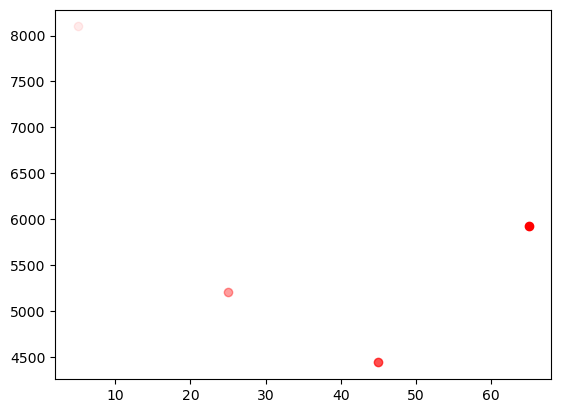

In [19]:

# pred_horiz
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    for scale in config.scales:
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("csv_val_files_non_zero", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
#                     print (cityname, " Empty/Not found, ignoring; plot will be missing")
#                     print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model"].tolist()
                loss = df.loss.tolist()

                # get the last epoch (a.k.a converged model)
                epoch_list = epoch_list[-1]
                val_loss = val_loss[-1]
                
#                 if naive_model[-1] < val_loss:
#                     # invalid, GIGO regime
#                     continue
                    
#                 if loss[-1] > val_loss:
#                     # invalid, Underfitting
#                     continue
                          
                
                
                if cityname in city_label_printed:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/65)
                else:
                    plt.scatter(scale, val_loss, 
                             color=city_color[cityname],\
                            alpha=scale/65, \
                            label=prefix)
                    city_label_printed.append(cityname)

plt.xlabel("Scales")
plt.ylabel("Validation-MSE \n(min {20 epochs, early-stopping})")
plt.yscale('log')
plt.legend()
plt.show()